#### Цель задания:
Познакомиться с основами обучения с подкреплением (Reinforcement Learning, RL), понять основные концепции и применить их на практике, используя простой алгоритм Q-Learning для решения задачи.

#### Задание:

1. **Теоретическая часть:**
    - Прочитайте материалы о концепциях обучения с подкреплением: агент, среда, действия, награды, состояния, политика, функция ценности и функция награды.
    - Напишите краткое эссе (1-2 страницы) о том, как обучение с подкреплением отличается от других видов обучения (например, обучение с учителем и обучение без учителя).

2. **Практическая часть:**
    - Реализуйте алгоритм Q-Learning для решения задачи "Замкнутый лабиринт" (Gridworld).
    - Визуализируйте политику и функцию ценности, найденные вашим агентом.

3. **Дополнительные задания (для продвинутых студентов):**
    - Реализуйте алгоритм SARSA и сравните его результаты с Q-Learning на той же задаче.
    - Изучите и реализуйте epsilon-greedy стратегию для выбора действий.

**Все результаты выполнения работы поместите в один блокнот Colab, сохраните, расшарьте для просмотра и направьте преподавателю на проверку.**


#### Подробное описание заданий 2 и 3:

2. **Практическая часть:**

    **Часть 1: Реализация Q-Learning**
    - Создайте среду "Gridworld" размером 5x5. Ваша задача — найти путь от стартовой клетки (в левом верхнем углу) до целевой клетки (в правом нижнем углу), избегая препятствий.
    - Используйте следующую формулу обновления Q-значений:

$
Q(s, a) \leftarrow Q(s, a) + \alpha [r + \gamma \max_{a'} Q(s', a') - Q(s, a)]
$

      где:
- $ s $ — текущее состояние,
- $ a $ — текущее действие,
- $ r $ — награда,
- $ s' $ — новое состояние,
- $ \alpha $ — скорость обучения (learning rate),
- 4 \gamma $ — коэффициент дисконтирования (discount factor).

    **Пример кода для начала:**

    ```python
    import numpy as np

    # Параметры
    alpha = 0.1
    gamma = 0.9
    epsilon = 0.1
    episodes = 1000
    grid_size = 5

    # Инициализация Q-таблицы
    Q = np.zeros((grid_size, grid_size, 4))

    # Функции для выбора действий и обновления Q-таблицы
    def choose_action(state):
        if np.random.rand() < epsilon:
            return np.random.randint(4)
        else:
            return np.argmax(Q[state])

    def update_q(state, action, reward, next_state):
        best_next_action = np.argmax(Q[next_state])
        td_target = reward + gamma * Q[next_state][best_next_action]
        td_error = td_target - Q[state][action]
        Q[state][action] += alpha * td_error

    # Обучение агента
    for episode in range(episodes):
        state = (0, 0)
        done = False
        while not done:
            action = choose_action(state)
            next_state, reward, done = step(state, action)
            update_q(state, action, reward, next_state)
            state = next_state

    # Визуализация политики
    policy = np.argmax(Q, axis=2)
    print("Оптимальная политика:")
    print(policy)
    ```

    **Часть 2: Визуализация политики и функции ценности**
    - Визуализируйте оптимальную политику и функцию ценности после обучения.
    - Объясните результаты и проанализируйте, как агент принимает решения в разных состояниях.

3. **Дополнительные задания:**
    - Реализуйте алгоритм SARSA и сравните его с Q-Learning.
    - Внедрите epsilon-greedy стратегию для выбора действий и проанализируйте ее влияние на обучение.

#### Критерии оценки:

- Понимание теоретических концепций обучения с подкреплением.
- Корректность реализации алгоритма Q-Learning.
- Качество визуализации и анализ результатов.
- Выполнение дополнительных заданий (если применимо).


#Примеры кода


**Политика:** Оптимальная политика показывает действия, которые агент предпочитает в каждом состоянии, чтобы максимизировать награду.

------------
**Функция ценности:** Функция ценности показывает ожидаемую накопленную награду для каждого состояния.

Реализация Q-Learning

In [ ]:
import numpy as np

# Параметры
alpha = 0.1
gamma = 0.9
epsilon = 0.1
episodes = 1000
grid_size = 5

# Действия: вверх, вниз, влево, вправо
actions = [(-1, 0), (1, 0), (0, -1), (0, 1)]

# Инициализация Q-таблицы
Q = np.zeros((grid_size, grid_size, len(actions)))

# Функции для выбора действий и обновления Q-таблицы
def choose_action(state):
    if np.random.rand() < epsilon:
        return np.random.randint(len(actions))
    else:
        return np.argmax(Q[state])

def step(state, action):
    next_state = (state[0] + actions[action][0], state[1] + actions[action][1])
    if next_state[0] < 0 or next_state[0] >= grid_size or next_state[1] < 0 or next_state[1] >= grid_size:
        next_state = state  # оставаться на месте, если выходит за пределы
    reward = 1 if next_state == (grid_size-1, grid_size-1) else -0.1
    done = next_state == (grid_size-1, grid_size-1)
    return next_state, reward, done

def update_q(state, action, reward, next_state):
    best_next_action = np.argmax(Q[next_state])
    td_target = reward + gamma * Q[next_state][best_next_action]
    td_error = td_target - Q[state][action]
    Q[state][action] += alpha * td_error

# Обучение агента
for episode in range(episodes):
    state = (0, 0)
    done = False
    while not done:
        action = choose_action(state)
        next_state, reward, done = step(state, action)
        update_q(state, action, reward, next_state)
        state = next_state

# Визуализация политики
policy = np.argmax(Q, axis=2)
print("Оптимальная политика:")
print(policy)


Оптимальная политика:
[[3 3 1 1 1]
 [3 3 1 1 1]
 [3 3 3 3 1]
 [1 3 3 3 1]
 [0 3 3 3 0]]


Визуализация политики и функции ценности

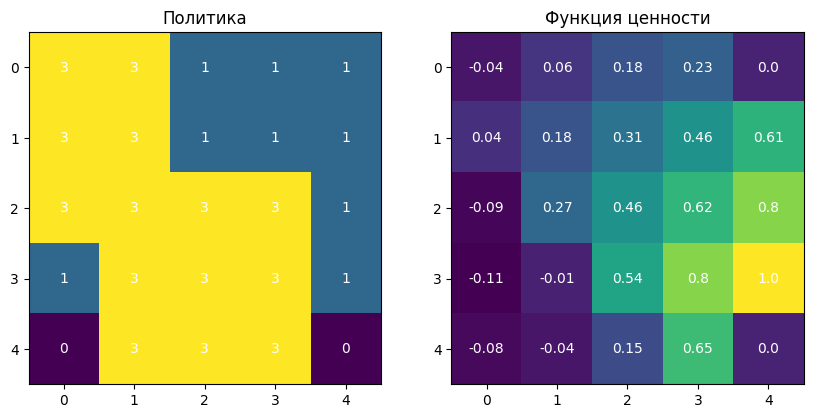

In [ ]:
import matplotlib.pyplot as plt

# Функция ценности
value_function = np.max(Q, axis=2)

plt.figure(figsize=(10, 6))

# Политика
plt.subplot(1, 2, 1)
plt.title('Политика')
plt.imshow(policy, cmap='viridis', origin='upper')
for i in range(grid_size):
    for j in range(grid_size):
        plt.text(j, i, policy[i, j], ha='center', va='center', color='white')

# Функция ценности
plt.subplot(1, 2, 2)
plt.title('Функция ценности')
plt.imshow(value_function, cmap='viridis', origin='upper')
for i in range(grid_size):
    for j in range(grid_size):
        plt.text(j, i, round(value_function[i, j], 2), ha='center', va='center', color='white')

plt.show()


Реализация SARSA

In [ ]:
def update_sarsa_q(state, action, reward, next_state, next_action):
    td_target = reward + gamma * Q[next_state][next_action]
    td_error = td_target - Q[state][action]
    Q[state][action] += alpha * td_error

# Обучение агента с использованием SARSA
Q = np.zeros((grid_size, grid_size, len(actions)))
for episode in range(episodes):
    state = (0, 0)
    action = choose_action(state)
    done = False
    while not done:
        next_state, reward, done = step(state, action)
        next_action = choose_action(next_state)
        update_sarsa_q(state, action, reward, next_state, next_action)
        state, action = next_state, next_action

policy_sarsa = np.argmax(Q, axis=2)
print("Оптимальная политика (SARSA):")
print(policy_sarsa)


Оптимальная политика (SARSA):
[[3 1 1 1 1]
 [3 3 1 3 1]
 [1 3 1 1 1]
 [3 3 1 3 1]
 [3 3 3 3 0]]


Реализация epsilon-greedy стратегии

In [ ]:
def update_sarsa_q(state, action, reward, next_state, next_action):
    td_target = reward + gamma * Q[next_state][next_action]
    td_error = td_target - Q[state][action]
    Q[state][action] += alpha * td_error

# Обучение агента с использованием SARSA
Q = np.zeros((grid_size, grid_size, len(actions)))
for episode in range(episodes):
    state = (0, 0)
    action = choose_action(state)
    done = False
    while not done:
        next_state, reward, done = step(state, action)
        next_action = choose_action(next_state)
        update_sarsa_q(state, action, reward, next_state, next_action)
        state, action = next_state, next_action

policy_sarsa = np.argmax(Q, axis=2)
print("Оптимальная политика (SARSA):")
print(policy_sarsa)


Оптимальная политика (SARSA):
[[3 1 1 1 1]
 [3 3 1 1 1]
 [3 1 1 1 1]
 [3 3 3 1 1]
 [3 3 3 3 0]]


#РЕШЕНИЕ:
#Основы обучения с подкреплением

Важно понять несколько ключевых концепций, которые лежат в основе обучения с подкреплением (RL):

Агент — это объект, который учится. Он может быть программой или роботом, который взаимодействует с окружающей средой.

Среда (Environment) — это всё, с чем агент взаимодействует. Например, в игре средой может быть сама игра, а в задаче управления роботом — окружающее пространство.

Состояние (State) — это описание текущего положения агента в среде. Например, в игре состояние может включать положение игрока на экране, его здоровье и другие параметры.

Действие (Action) — это выбор агента, который он может сделать в каждом состоянии. Например, в игре это может быть движение персонажа, стрельба или использование предметов.

Вознаграждение (Reward) — это числовая оценка действия агента, получаемая после его выполнения. Это может быть положительным числом (если действие было хорошим) или отрицательным (если действие было плохим).

Политика (Policy) — это стратегия агента, которая определяет, какое действие он должен выполнить в каждом состоянии. Политика может быть детерминированной (всегда одно и то же действие в одном состоянии) или стохастической (действия выбираются с некоторой вероятностью).

Функция ценности (Value Function) — это функция, которая оценивает "ценность" каждого состояния или состояния-диапазона действий, помогая агенту выбирать наилучшее действие для получения наибольшего долгосрочного вознаграждения.

Модель среды — это модель, которая предсказывает, что произойдёт в следующем состоянии, если агент выполнит определённое действие. Это не всегда необходимо в обучении с подкреплением, но может помочь улучшить эффективность.

#Оффлайн и онлайн обучение
Off-policy (например, Q-Learning) — агент обучается на данных, собранных по другой политике, не обязательно текущей. В Q-Learning используется стратегия, отличная от той, которую агент использует для обучения (например, агенты могут исследовать случайные действия, но их политика будет максимизировать Q-значения).

On-policy (например, SARSA) — агент учится непосредственно на действиях, которые он выбирает по текущей политике. Это означает, что обновления Q-значений зависят от того, какие действия агент действительно предпринимает.

#Функция ценности и обновление
1. Q-ценность
Q-ценность (
𝑄
(
𝑠
,
𝑎
)
Q(s,a)) — это мера того, насколько выгодно агенту выполнить действие
𝑎
a в состоянии
𝑠
s. Она предсказывает ожидаемую сумму вознаграждений от выполнения этого действия и следования оптимальной политике в будущем.

Q-ценности обновляются на основе фактических вознаграждений, полученных агентом в процессе взаимодействия с окружающей средой. Формула обновления (для Q-Learning) позволяет учитывать не только текущие вознаграждения, но и ожидаемое вознаграждение в будущем.

2. Максимизация вознаграждения
Суть алгоритмов Q-Learning и SARSA заключается в том, чтобы максимизировать сумму вознаграждений (или "долгосрочное вознаграждение"). Чтобы это достичь, агент должен оптимизировать свои действия, используя методы оценки, такие как Q-функция. Параметр
𝛾
γ (коэффициент дисконтирования) определяет важность будущих вознаграждений. Чем ближе
𝛾
γ к 1, тем важнее для агента долгосрочные вознаграждения.

3. Ключевая разница между Q-Learning и SARSA
Q-Learning используется для оценки максимальных ценностей действий, независимо от того, какое действие агент действительно выберет. Агент обновляет Q-ценности на основе максимального возможного вознаграждения, что делает его более "агрессивным" в поиске оптимальной политики.

SARSA, напротив, использует фактически выбранное действие для обновления Q-ценности, что делает его более "осторожным" и ориентированным на текущую политику агента. Этот подход более консервативен, так как не делает сильных предположений о том, как будет вести себя агент в будущем.

#Алгоритм epsilon-greedy
Зачем нужна epsilon-greedy стратегия?
Алгоритм epsilon-greedy играет важную роль в сочетании исследования (exploration) и эксплуатации (exploitation):

Эксплуатация — агент всегда выбирает действие, которое даёт наибольшее ожидаемое вознаграждение. Это позволяет агенту быстро научиться хорошо действовать в среде.
Исследование — агент иногда выбирает случайное действие, что позволяет ему исследовать другие возможности, которые могут привести к более высоким вознаграждениям в будущем.
Формулировка epsilon-greedy:
С вероятностью
1
−
𝜖
1−ϵ агент выбирает действие с наибольшим Q-значением в текущем состоянии (эксплуатация).
С вероятностью
𝜖
ϵ агент выбирает случайное действие (исследование).
Когда агент начинает обучение, он больше исследует (большой
𝜖
ϵ) и постепенно переходит к более агрессивной эксплуатации (меньший
𝜖
ϵ). Это позволяет агенту сначала изучить пространство возможных действий, а затем начать использовать оптимальные стратегии.

Проблемы и решения с epsilon-greedy:
Проблема слишком большого
𝜖
ϵ — если
𝜖
ϵ слишком велико, агент будет часто выбирать случайные действия, что замедлит обучение.
Проблема слишком малого
𝜖
ϵ — если
𝜖
ϵ слишком мало, агент может застрять в локальном максимуме, не исследуя пространство возможных решений.
Чтобы решить эти проблемы,
𝜖
ϵ обычно уменьшается по мере обучения (например, с 1.0 до 0.1), что позволяет агенту постепенно переходить от исследования к эксплуатации.

#Альтернативы epsilon-greedy
Иногда epsilon-greedy может быть заменена более сложными методами выбора действий, например:

Softmax стратегия — вместо случайного выбора действия с фиксированной вероятностью, она распределяет вероятность выбора действия в зависимости от его Q-значения. Чем выше Q-ценность, тем выше вероятность выбора этого действия.

Upper Confidence Bound (UCB) — стратегия, которая не только учитывает средние вознаграждения, но и степень неопределенности по каждому действию, что позволяет более эффективно исследовать неопределённые действия.

Обучение с подкреплением — это мощный инструмент для решения задач, где агент должен научиться действовать в сложной среде. Алгоритмы Q-Learning и SARSA позволяют агентам находить оптимальные политики, оценивая действия через Q-функцию. Оба алгоритма применяют epsilon-greedy стратегию для балансировки исследования и эксплуатации.

Важно не только понять алгоритмы на теоретическом уровне, но и научиться их практическому применению. Важно начать с простых задач и постепенно углубляться в детали, учитывая, что обучение с подкреплением часто требует экспериментирования с гиперпараметрами и алгоритмами.

Итак, чтобы полностью разобраться в этих концепциях, начинающим рекомендуется:

Попробовать реализовать алгоритмы Q-Learning и SARSA на простых примерах, таких как лабиринты или игры.
Экспериментировать с различными значениями
𝛾
γ,
𝛼
α, и
𝜖
ϵ для наблюдения их влияния на обучение агента.
Изучать более сложные алгоритмы и методы, такие как Deep Q-Networks (DQN), которые используют нейронные сети для аппроксимации Q-функции в сложных средах.

#Визуализация политики и функции ценности. с использованием Q-Learning

Этот код обучает агента проходить лабиринт с использованием Q-Learning, а затем визуализирует оптимальную политику, где каждое число на клетке соответствует выбранному действию (например, 0 — вверх, 1 — вниз, 2 — влево, 3 — вправо).



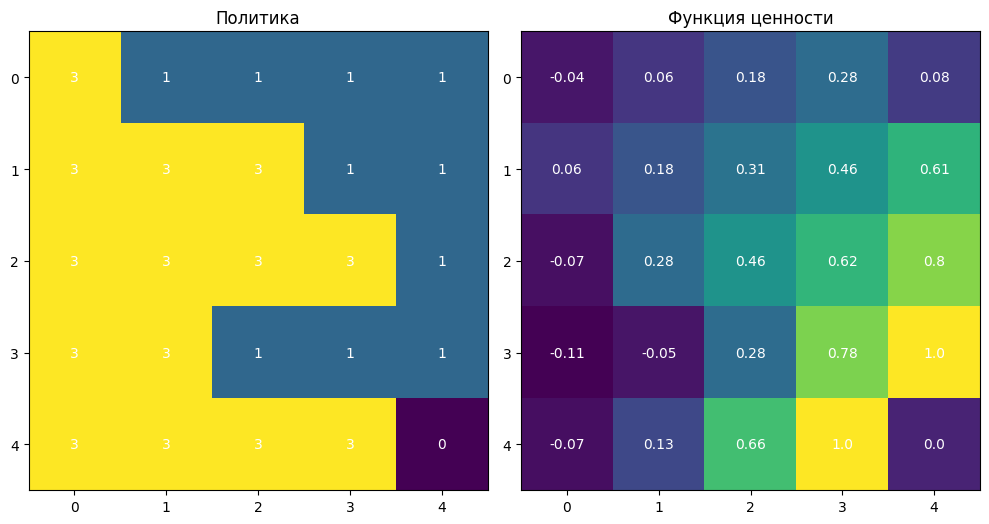

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

alpha = 0.1
gamma = 0.9
epsilon = 0.1
episodes = 1000
grid_size = 5

# Действия: вверх, вниз, влево, вправо
actions = [(-1, 0), (1, 0), (0, -1), (0, 1)]

# Инициализация Q-таблицы
Q = np.zeros((grid_size, grid_size, len(actions)))

# Функции для выбора действий и обновления Q-таблицы
def choose_action(state):
    if np.random.rand() < epsilon:
        return np.random.randint(len(actions))
    else:
        return np.argmax(Q[state])

def step(state, action):
    next_state = (state[0] + actions[action][0], state[1] + actions[action][1])
    if next_state[0] < 0 or next_state[0] >= grid_size or next_state[1] < 0 or next_state[1] >= grid_size:
        next_state = state
    reward = 1 if next_state == (grid_size-1, grid_size-1) else -0.1
    done = next_state == (grid_size-1, grid_size-1)
    return next_state, reward, done

def update_q(state, action, reward, next_state):
    best_next_action = np.argmax(Q[next_state])
    td_target = reward + gamma * Q[next_state][best_next_action]
    td_error = td_target - Q[state][action]
    Q[state][action] += alpha * td_error

# Обучение агента
for episode in range(episodes):
    state = (0, 0)
    done = False
    while not done:
        action = choose_action(state)
        next_state, reward, done = step(state, action)
        update_q(state, action, reward, next_state)
        state = next_state

# Визуализация политики и функции ценности
policy = np.argmax(Q, axis=2)
value_function = np.max(Q, axis=2)

# Построение графиков
plt.figure(figsize=(10, 6))

#Политика
plt.subplot(1, 2, 1)
plt.title('Политика')
plt.imshow(policy, cmap='viridis', origin='upper')
for i in range(grid_size):
    for j in range(grid_size):
        plt.text(j, i, policy[i, j], ha='center', va='center', color='white')

# Функция ценности
plt.subplot(1, 2, 2)
plt.title('Функция ценности')
plt.imshow(value_function, cmap='viridis', origin='upper')
for i in range(grid_size):
    for j in range(grid_size):
        plt.text(j, i, round(value_function[i, j], 2), ha='center', va='center', color='white')

plt.tight_layout()
plt.show()


#Реализация SARSA

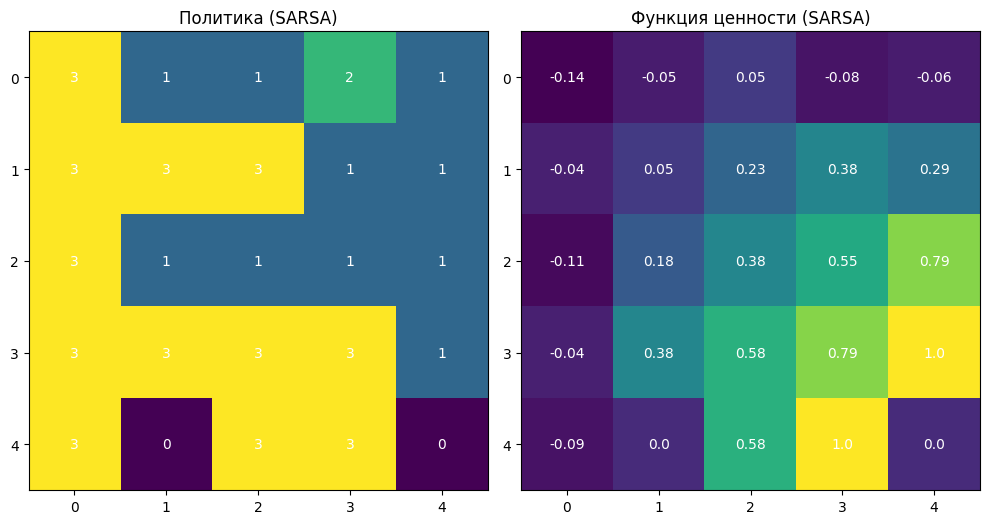

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

alpha = 0.1
gamma = 0.9
epsilon = 0.1
episodes = 1000
grid_size = 5

# Действия: вверх, вниз, влево, вправо
actions = [(-1, 0), (1, 0), (0, -1), (0, 1)]

# Инициализация Q-таблицы
Q = np.zeros((grid_size, grid_size, len(actions)))

# Функции для выбора действий и обновления Q-таблицы
def choose_action(state):
    if np.random.rand() < epsilon:
        return np.random.randint(len(actions))
    else:
        return np.argmax(Q[state])

def step(state, action):
    next_state = (state[0] + actions[action][0], state[1] + actions[action][1])
    if next_state[0] < 0 or next_state[0] >= grid_size or next_state[1] < 0 or next_state[1] >= grid_size:
        next_state = state
    reward = 1 if next_state == (grid_size-1, grid_size-1) else -0.1
    done = next_state == (grid_size-1, grid_size-1)
    return next_state, reward, done

def update_sarsa_q(state, action, reward, next_state, next_action):
    td_target = reward + gamma * Q[next_state][next_action]
    td_error = td_target - Q[state][action]
    Q[state][action] += alpha * td_error

# Обучение агента с использованием SARSA
for episode in range(episodes):
    state = (0, 0)
    action = choose_action(state)
    done = False
    while not done:
        next_state, reward, done = step(state, action)
        next_action = choose_action(next_state)
        update_sarsa_q(state, action, reward, next_state, next_action)
        state, action = next_state, next_action

# Визуализация политики и функции ценности
policy_sarsa = np.argmax(Q, axis=2)
value_function_sarsa = np.max(Q, axis=2)

# Построение графиков
plt.figure(figsize=(10, 6))

# Политика
plt.subplot(1, 2, 1)
plt.title('Политика (SARSA)')
plt.imshow(policy_sarsa, cmap='viridis', origin='upper')
for i in range(grid_size):
    for j in range(grid_size):
        plt.text(j, i, policy_sarsa[i, j], ha='center', va='center', color='white')

# Функция ценности
plt.subplot(1, 2, 2)
plt.title('Функция ценности (SARSA)')
plt.imshow(value_function_sarsa, cmap='viridis', origin='upper')
for i in range(grid_size):
    for j in range(grid_size):
        plt.text(j, i, round(value_function_sarsa[i, j], 2), ha='center', va='center', color='white')

plt.tight_layout()
plt.show()


#Реализация epsilon-greedy стратегии

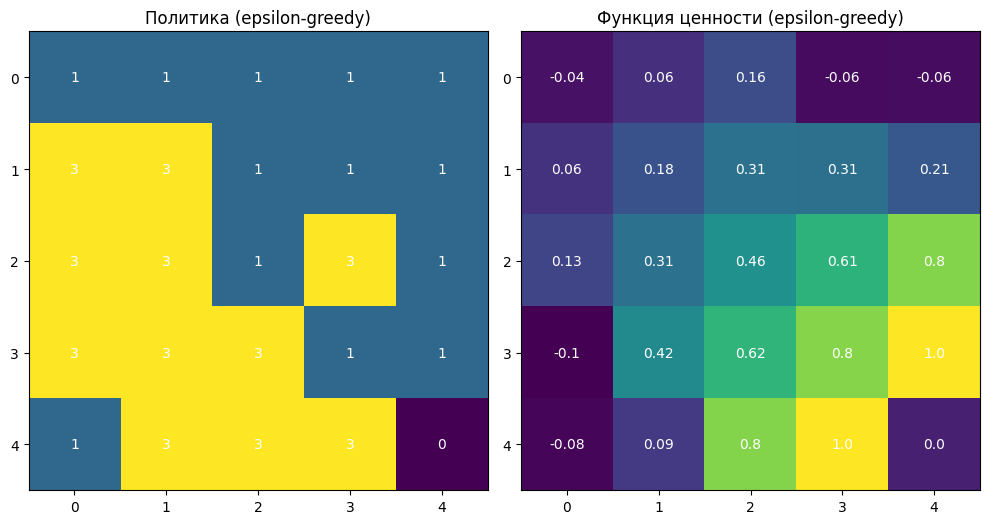

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

alpha = 0.1
gamma = 0.9
epsilon = 0.1
episodes = 1000
grid_size = 5

# Действия: вверх, вниз, влево, вправо
actions = [(-1, 0), (1, 0), (0, -1), (0, 1)]

# Инициализация Q-таблицы
Q = np.zeros((grid_size, grid_size, len(actions)))

# Функции для выбора действий с epsilon-greedy стратегией
def choose_action(state):
    if np.random.rand() < epsilon:
        return np.random.randint(len(actions))
    else:
        return np.argmax(Q[state])

def step(state, action):
    next_state = (state[0] + actions[action][0], state[1] + actions[action][1])
    if next_state[0] < 0 or next_state[0] >= grid_size or next_state[1] < 0 or next_state[1] >= grid_size:
        next_state = state
    reward = 1 if next_state == (grid_size-1, grid_size-1) else -0.1
    done = next_state == (grid_size-1, grid_size-1)
    return next_state, reward, done

def update_q(state, action, reward, next_state):
    best_next_action = np.argmax(Q[next_state])
    td_target = reward + gamma * Q[next_state][best_next_action]
    td_error = td_target - Q[state][action]
    Q[state][action] += alpha * td_error

# Обучение агента с использованием epsilon-greedy стратегии
for episode in range(episodes):
    state = (0, 0)
    done = False
    while not done:
        action = choose_action(state)
        next_state, reward, done = step(state, action)
        update_q(state, action, reward, next_state)
        state = next_state

# Визуализация политики и функции ценности
policy_epsilon_greedy = np.argmax(Q, axis=2)
value_function_epsilon_greedy = np.max(Q, axis=2)

# Построение графиков
plt.figure(figsize=(10, 6))

# Политика
plt.subplot(1, 2, 1)
plt.title('Политика (epsilon-greedy)')
plt.imshow(policy_epsilon_greedy, cmap='viridis', origin='upper')
for i in range(grid_size):
    for j in range(grid_size):
        plt.text(j, i, policy_epsilon_greedy[i, j], ha='center', va='center', color='white')

# Функция ценности
plt.subplot(1, 2, 2)
plt.title('Функция ценности (epsilon-greedy)')
plt.imshow(value_function_epsilon_greedy, cmap='viridis', origin='upper')
for i in range(grid_size):
    for j in range(grid_size):
        plt.text(j, i, round(value_function_epsilon_greedy[i, j], 2), ha='center', va='center', color='white')

plt.tight_layout()
plt.show()


#Заключение
Обучение с подкреплением позволяет создавать агентов, которые могут обучаться на основе взаимодействия с окружающей средой. Алгоритмы Q-Learning и SARSA — это два популярных метода, которые используют Q-функцию для оценки ценности действий. epsilon-greedy стратегия помогает агентам эффективно балансировать между исследованием новых возможностей и эксплуатацией уже известных эффективных действий.

Каждый из этих алгоритмов имеет свои особенности, и их использование зависит от конкретной задачи. Например, Q-Learning ориентирован на поиск максимальной ценности, независимо от текущей политики, а SARSA использует реальную политику агента для обновления ценностей, что делает его более осторожным.

С помощью этих методов можно решать различные задачи, включая игры, задачи управления и даже задачи робототехники, где агент должен обучаться выполнять действия в сложной среде.